# Data description

---

We are using five datasets in this project:

- `data/friends_quotes.csv`: sourced from [Kaggle link](https://www.kaggle.com/datasets/ryanstonebraker/friends-transcript)
  - `author`: The character who said the quote
  - `episode_number`: episode number
  - `episode_title`: episode title
  - `quote`: the quote itself
  - `quote_order`: the order of the quote in the episode
  - `season`: the season number

Sentiment analysis datasets: [Kaggle link](https://www.kaggle.com/datasets/ekrembayar/sentiment-lexicons-for-text-mining)

- `data/afinn.csv`: AFINN-111 sentiment analysis word list
  - `word`: the word
  - `value`: range from -5 (very negative) to +5 (very positive)
- `data/bing.csv`: Bing Liu's opinion lexicon
  - `word`: the word
  - `sentiment`: range from -1 (negative) to +1 (positive)
- `data/loughran.csv`: Loughran-McDonald sentiment word list
  - `word`: the word
  - `sentiment`: negative and positive
- `data/nrc.csv`: NRC Emotion Lexicon
  - `word`: the word
  - `sentiment`: the sentiment (e.g. anger, anticipation, disgust, fear, joy, sadness, surprise, trust)

## Acknowledgements

---

The raw transcripts of every episode were originally scraped from here: https://fangj.github.io/friends/.
Additional work cleaning up the data and removing invalid rows was done by [Jorge Nachtigall](https://www.kaggle.com/jorgenachtigall)

## Package imports

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Friends quotes dataset

---

In [2]:
quotes = pd.read_csv("../data/friends_quotes.csv")
quotes.head()

,author,episode_number,episode_title,quote,quote_order,season
0,Monica,1.0,Monica Gets A Roommate,There's nothing to tell! He's just some guy I ...,0.0,1.0
1,Joey,1.0,Monica Gets A Roommate,"C'mon, you're going out with the guy! There's ...",1.0,1.0
2,Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice. So does he have a hum...",2.0,1.0
3,Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
4,Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don't want her to go through w...",4.0,1.0


In [3]:
# Check the number of unique authors
quotes["author"].unique().shape[0]

1024

In [4]:
main_characters = [
    "Ross",
    "Rachel",
    "Monica",
    "Chandler",
    "Joey",
    "Phoebe",
]

### Quotes counts

- Quotes counts by character and season


In [5]:
# Count the number of quotes by main character at each season
quotes_by_character = quotes.groupby(["author", "season"]).size().unstack()
quotes_by_character = quotes_by_character.fillna(0)
quotes_by_character = quotes_by_character.astype(int)
quotes_by_character = quotes_by_character.loc[main_characters]
quotes_by_character

season,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
author,,,,,,,,,,
Ross,919,68,1074,788,866,911,838,972,789,863
Rachel,828,81,925,885,902,991,1098,1070,772,766
Monica,854,59,847,744,891,899,911,809,821,681
Chandler,765,43,825,889,936,1035,855,649,805,686
Joey,613,47,774,787,921,906,948,864,786,727
Phoebe,599,54,792,687,805,787,811,760,721,683


### Count the quotes mentions of each character

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ross'),
  Text(1, 0, 'Rachel'),
  Text(2, 0, 'Monica'),
  Text(3, 0, 'Chandler'),
  Text(4, 0, 'Joey'),
  Text(5, 0, 'Phoebe')])

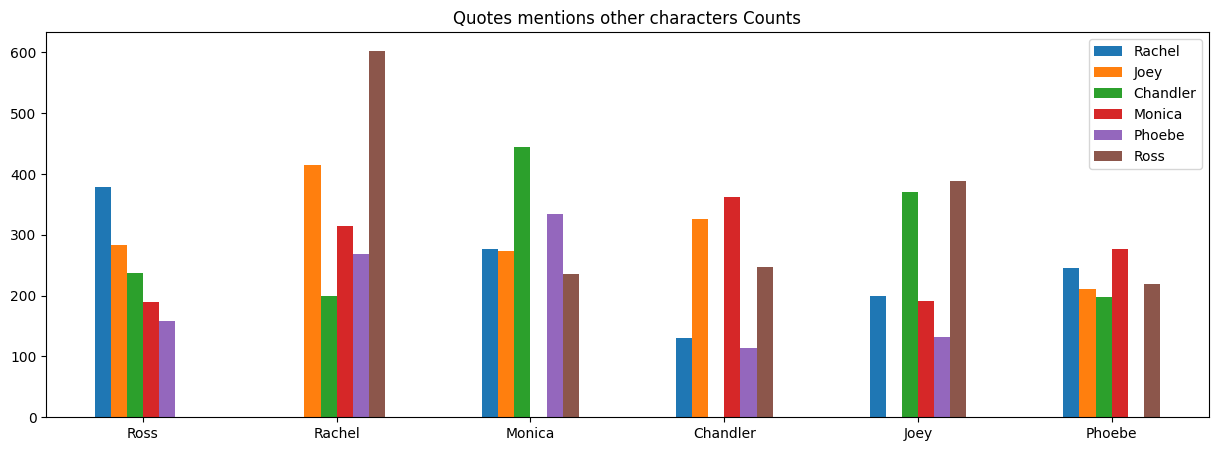

In [6]:
def name_mentioned_count(df: pd.DataFrame, target_author: str) -> pd.Series:
    """Count the number of times a character mentions another character in their quotes."""
    # Filter the dataframe for the target author
    target_quotes = df[df["author"] == target_author]
    # Initialize a dictionary to store the counts
    counts = {name: 0 for name in main_characters if name != target_author}
    # Iterate through the quotes of the target author
    for quote in target_quotes["quote"]:
        # Check if any of the other characters are mentioned in the quote
        for name in counts.keys():
            if name in quote:
                counts[name] += 1
    # Convert the counts dictionary to a pandas Series
    counts_series = pd.Series(counts)
    counts_series = counts_series.sort_values(ascending=False)
    counts_series.name = target_author
    return counts_series


name_mentioned_count_df = pd.concat([name_mentioned_count(quotes, target_author) for target_author in main_characters], axis=1).T
name_mentioned_count_df.plot(kind="bar", figsize=(15, 5), title="Quotes mentions other characters Counts")
# xlabel rotation
plt.xticks(rotation=0)

## Sentiment analysis datasets

---

In [7]:
# read the sentiment analysis datasets
afinn = pd.read_csv("../data/afinn.csv")
bing = pd.read_csv("../data/bing.csv")
loughran = pd.read_csv("../data/loughran.csv")
nrc = pd.read_csv("../data/nrc.csv")

### AFINN-111 sentiment analysis word list

<Axes: title={'center': 'AFINN-111 sentiment analysis word list'}, xlabel='value'>

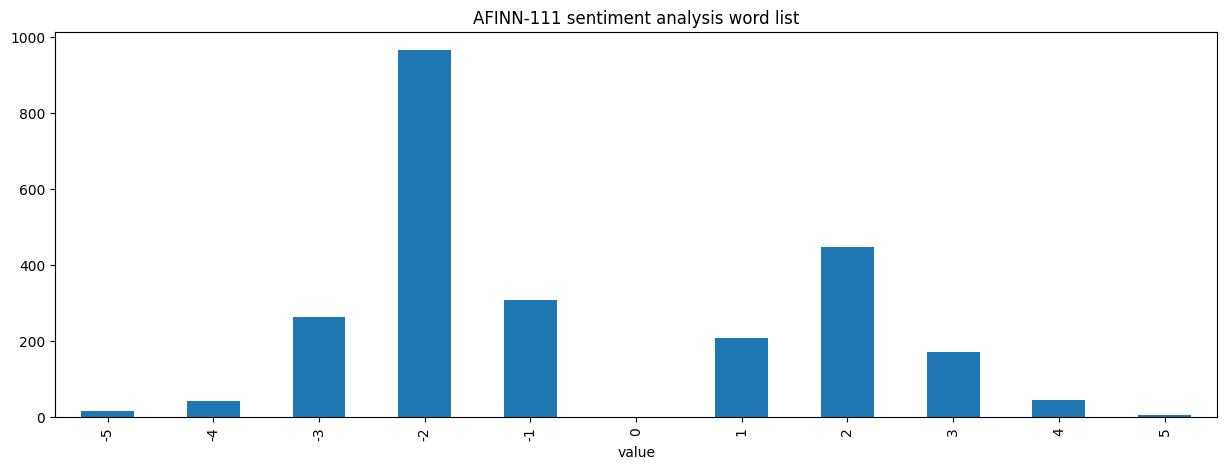

In [8]:
afinn_values_count = afinn["value"].value_counts().sort_index()
afinn_values_count.plot(kind="bar", figsize=(15, 5), title="AFINN-111 sentiment analysis word list")

## Bing Liu's opinion lexicon

<Axes: title={'center': "Bing Liu's opinion lexicon"}, xlabel='sentiment'>

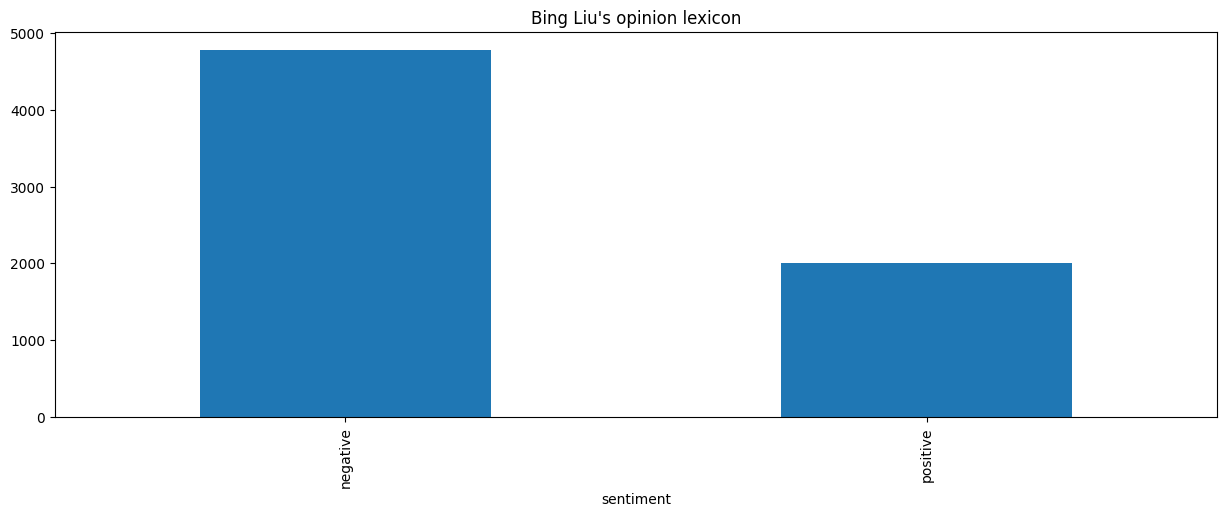

In [9]:
bing_values_count = bing["sentiment"].value_counts().sort_index()
bing_values_count.plot(kind="bar", figsize=(15, 5), title="Bing Liu's opinion lexicon")

### Loughran-McDonald sentiment word list

<Axes: title={'center': 'Loughran-McDonald sentiment word list'}, xlabel='sentiment'>

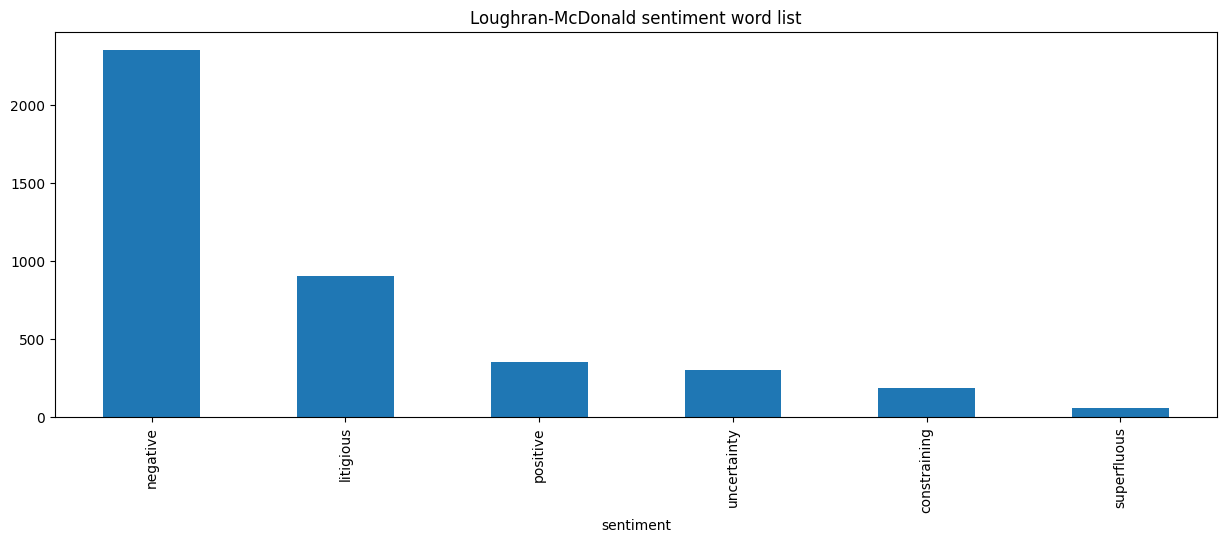

In [10]:
loughran_values_count = loughran["sentiment"].value_counts().sort_values(ascending=False)
loughran_values_count.plot(kind="bar", figsize=(15, 5), title="Loughran-McDonald sentiment word list")

### NRC Emotion Lexicon

<Axes: title={'center': 'NRC Emotion Lexicon'}, xlabel='sentiment'>

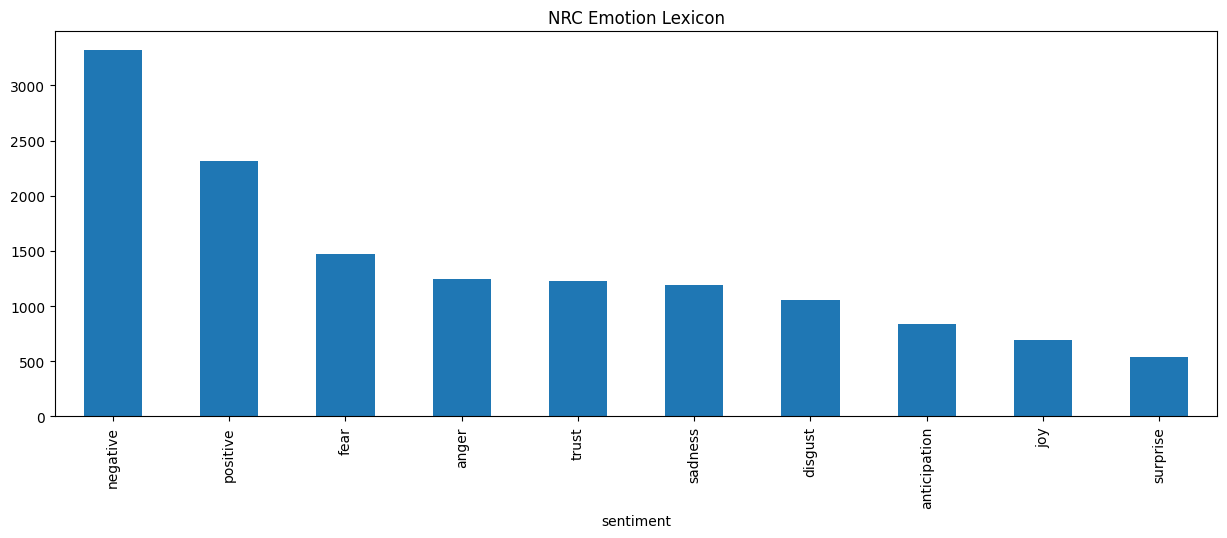

In [11]:
nrc_values_count = nrc["sentiment"].value_counts().sort_values(ascending=False)
nrc_values_count.plot(kind="bar", figsize=(15, 5), title="NRC Emotion Lexicon")